<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/attractor/gergo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk", style="ticks")
import sklearn
import os
from os.path import join
import scipy

In [ ]:


!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3628900eb6c0893a25809aa53c8259d1b82761a67f11cae12386a6932349e409
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykerne

In [ ]:
basepath = "/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003"

In [ ]:
savepath = "/gdrive/MyDrive/"

In [ ]:
ls -lah /gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003

total 563M
-rw------- 1 root root   73 Mar 26  2023 'Activity periods.csv'
drwx------ 2 root root 4.0K Mar 12 22:03  behavior/
-rw------- 1 root root 378M Apr  1  2023  dfof_all_cells_with_statuses.csv
-rw------- 1 root root  89M Apr  1  2023  dfof.csv
drwx------ 2 root root 4.0K Mar 12 21:58  eeg/
-rw------- 1 root root  26K Apr  3  2023  paired_nrem_awake_cells_dabest.csv
-rw------- 1 root root  158 Apr  3  2023  paired_summary.csv
-rw------- 1 root root  43M Apr  1  2023  raw.csv
-rw------- 1 root root  19M Apr  1  2023  raw_spikes.csv
-rw------- 1 root root  16K Apr  3  2023  Significant_paired_DABEST_NREM.csv
-rw------- 1 root root  27M Apr  1  2023  spikes.csv
-rw------- 1 root root 8.9M Apr  1  2023  TSeries-07072021-0833_GC2-003_Cycle00001_Element00001_dfof.pdf


In [ ]:
dfof = pd.read_csv(join(basepath, "dfof.csv"))

In [ ]:
dfof = dfof.set_index("roi_label")

In [ ]:
velo_eeg = pd.read_csv(join(basepath, 'eeg', "velo_eeg.csv"))

In [ ]:
dfof

,0,1,2,3,4,5,6,7,8,9,...,35990,35991,35992,35993,35994,35995,35996,35997,35998,35999
roi_label,,,,,,,,,,,,,,,,,,,,,
0000-0277-0087,0.297815,0.491574,0.544590,-0.025363,0.181621,-0.023887,0.118205,0.159527,0.332917,0.017506,...,-0.053076,0.123848,-0.101783,0.086292,-0.033997,0.358587,0.213260,0.253953,-0.075372,0.016927
0000-0295-0095,0.276620,0.454543,0.784759,1.078670,1.263980,1.080744,0.905611,0.845654,1.505436,1.398616,...,-0.007586,0.279902,0.199223,0.368432,0.275368,0.210896,-0.028638,0.213288,0.257412,0.241526
0000-0291-0295,0.219876,0.531989,0.504726,1.029216,0.716344,1.293166,0.523663,0.848523,1.062514,1.750852,...,0.725248,0.273871,0.374907,1.111409,0.570967,0.854515,0.935095,0.860915,0.411796,0.519647
0000-0381-0124,0.234822,0.121192,-0.010536,0.244125,0.134383,0.228793,0.183177,0.528109,0.032226,0.556708,...,0.115176,0.293761,-0.020719,0.482280,0.194304,0.002378,-0.174816,-0.133470,-0.091631,-0.037536
0000-0304-0094,0.946416,0.835589,0.845840,0.795665,1.089163,1.150506,1.333019,0.630372,0.946935,0.496117,...,-0.097782,-0.001290,-0.043327,0.080075,-0.066904,-0.043616,0.013817,0.291425,0.243443,-0.285314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0000-0458-0464,0.247948,0.290922,0.104230,-0.151562,0.100955,0.374160,0.306145,-0.158020,0.339953,0.249610,...,0.238491,0.334081,0.022725,0.029804,0.096272,0.107648,0.434809,-0.058296,0.101279,0.056215
0000-0353-0078,0.642921,0.030463,0.350630,-0.169490,-0.026309,0.246604,-0.066306,0.461973,0.029450,0.419980,...,0.273642,0.027727,0.082276,0.166594,0.139738,0.438797,0.218760,0.383799,0.029426,0.412981
0000-0472-0421,0.409894,-0.337090,-0.079454,-0.105813,0.345960,0.273999,-0.323692,0.723700,0.570185,0.049604,...,-0.055785,-0.015101,0.325637,0.703349,0.455011,0.266581,0.470696,0.128827,0.477518,0.257190


In [ ]:
from sklearn.decomposition import PCA
# Dimensionality reduction with PCA
# awake and sleep are not well-separated; also, explained variance is low

pca = PCA()

X_new = pca.fit_transform(dfof.T)

In [ ]:
pc_dfof = pd.DataFrame(X_new.T, index=pd.RangeIndex(len(dfof), name='PC'))

In [ ]:
pc_dfof.loc['awake'] = velo_eeg['awake']
pc_dfof.loc['NREM'] = velo_eeg['NREM']
pc_dfof.loc['REM'] = velo_eeg['REM']
pc_dfof.loc['velo'] = velo_eeg['filtered velo']
#velo_eeg

In [ ]:
pcT = pc_dfof.T
pct = pcT.iloc[:1000]

<Axes: xlabel='0', ylabel='1'>

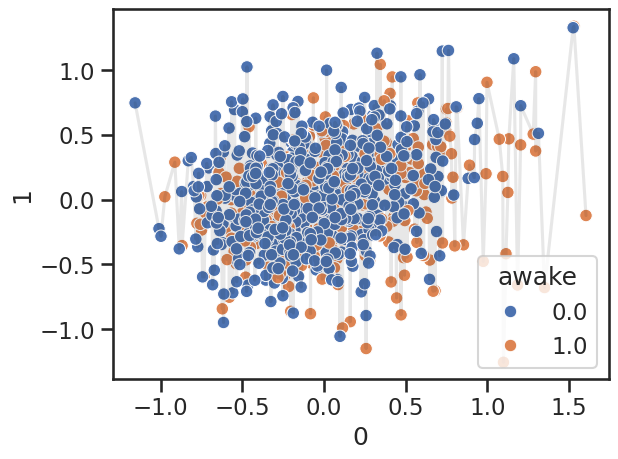

In [ ]:
sns.lineplot(data=pcT.loc[:1000], x=0, y=1, color='k', alpha=0.1)#, hue='awake')
sns.scatterplot(data=pcT.loc[:1000], x=0, y=1, hue='awake')#, hue='awake')

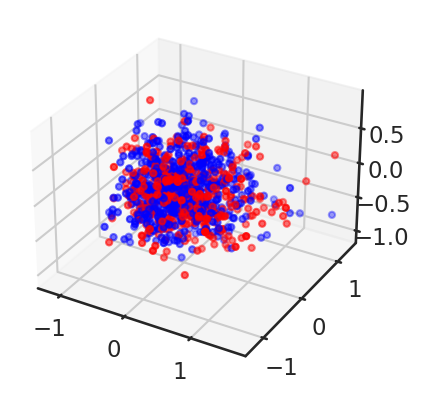

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pct[0], pct[1], pct[2], c=pct['awake'], cmap='bwr')

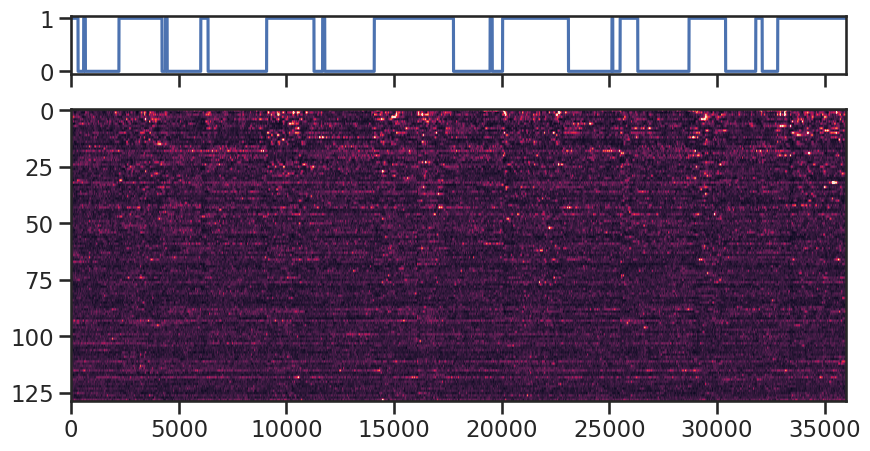

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios":[1,5]}, sharex=True, figsize=(10,5))
ax1.plot(velo_eeg['awake'])
# ax1.plot(velo_eeg['NREM'])
# ax1.plot(velo_eeg['REM'])
ax

ax2.imshow(dfof, aspect='auto', vmin=0, vmax=1)
#plt.colorbar()

Download dynamic component analysis

In [ ]:
!pip install git+https://github.com/BouchardLab/DynamicalComponentsAnalysis.git


  Cloning https://github.com/BouchardLab/DynamicalComponentsAnalysis.git to /tmp/pip-req-build-vp1hvccv
  Running command git clone --filter=blob:none --quiet https://github.com/BouchardLab/DynamicalComponentsAnalysis.git /tmp/pip-req-build-vp1hvccv
  Resolved https://github.com/BouchardLab/DynamicalComponentsAnalysis.git to commit d0636f7c11301667152504bdb93c5a88a50a1a68
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dca: filename=dca-1.0.0-py3-none-any.whl size=49880 sha256=69676a7ae133b7f2ea30eb568e9e3f64b7b1f84aca076036b20c08d6aa64a68e
  Stored in directory: /tmp/pip-ephem-wheel-cache-z897yfwk/wheels/7c/9c/cd/a3881e4b8fe80cdb8feeaadd85bceb2a98257ddceb09d6e92e
Successfully built dca


In [ ]:
from dca import DynamicalComponentsAnalysis as DCA, style
from dca.cov_util import calc_cross_cov_mats_from_data
from dca.synth_data import embedded_lorenz_cross_cov_mats, gen_lorenz_data, random_basis, median_subspace
from dca.plotting.fig1 import lorenz_fig_axes, plot_3d, plot_lorenz_3d, plot_traces, plot_dca_demo, plot_r2, plot_cov


In [ ]:
dfof.T.iloc[:10000]

roi_label,0000-0277-0087,0000-0295-0095,0000-0291-0295,0000-0381-0124,0000-0304-0094,0000-0155-0133,0000-0336-0120,0000-0272-0148,0000-0282-0050,0000-0306-0227,...,0000-0265-0260,0000-0292-0254,0000-0221-0420,0000-0294-0286,0000-0230-0311,0000-0458-0464,0000-0353-0078,0000-0472-0421,0000-0310-0301,0000-0491-0270
0,0.297815,0.276620,0.219876,0.234822,0.946416,-0.018001,0.006065,0.191205,0.244659,-0.157803,...,-0.279879,-0.091839,0.305138,0.478361,0.006505,0.247948,0.642921,0.409894,-0.089042,0.957121
1,0.491574,0.454543,0.531989,0.121192,0.835589,0.074138,0.225345,0.250816,-0.105938,0.037672,...,0.514606,-0.371865,0.018129,0.804008,0.109281,0.290922,0.030463,-0.337090,0.257106,0.010411
2,0.544590,0.784759,0.504726,-0.010536,0.845840,0.137097,0.334808,0.390898,0.297863,-0.007820,...,0.199049,0.453188,0.122998,-0.222067,0.116914,0.104230,0.350630,-0.079454,0.295299,0.851442
3,-0.025363,1.078670,1.029216,0.244125,0.795665,0.219607,-0.150145,0.701451,-0.093842,-0.056718,...,0.278443,0.175417,0.337161,0.148058,-0.169652,-0.151562,-0.169490,-0.105813,0.130626,1.256917
4,0.181621,1.263980,0.716344,0.134383,1.089163,-0.001172,0.083737,0.358255,0.029131,0.009923,...,0.097652,0.071268,0.103597,0.279749,-0.402460,0.100955,-0.026309,0.345960,-0.013098,-0.004411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.218409,0.032750,0.508545,0.027449,0.296602,0.099544,0.479631,0.000025,0.012535,0.083359,...,0.250366,0.185093,-0.015177,0.705576,-0.020182,0.000492,-0.125458,0.209756,0.132152,-0.263955
9996,0.082971,-0.052612,0.289949,0.005118,0.429768,-0.143016,-0.058756,0.299173,0.197544,0.217796,...,0.035769,0.303517,-0.031525,0.124211,0.005012,0.350496,-0.181962,-0.017036,0.185802,0.491140
9997,-0.010981,-0.018808,0.580466,0.295076,0.589613,-0.036057,0.045877,0.053798,0.018016,0.129993,...,-0.067102,0.175594,0.010332,0.447605,0.490150,0.052943,-0.104905,-0.249645,0.051265,-0.044021
9998,0.274983,-0.021746,0.080739,0.271410,0.605650,0.368056,-0.064389,0.459943,0.327523,-0.072477,...,-0.053285,-0.031059,0.203821,0.755045,-0.042656,0.012973,-0.258793,-0.289613,0.354853,0.138179


In [ ]:
#Run DCA
opt = DCA(T=10, d=2)
opt.fit(np.asarray(dfof.T))
V_dca = opt.coef_

#Project data onto DCA and PCA bases
X_dca = np.dot(np.asarray(dfof.T), V_dca)


In [ ]:
X_roll = dfof.T.rolling(10).mean().dropna()

In [ ]:
opt_roll = DCA(T=10, d=2)
opt_roll.fit(np.asarray(X_roll))
V_dca = opt_roll.coef_

In [ ]:
Xroll_dca = np.dot(np.asarray(X_roll), V_dca)


In [ ]:
opt_3 = DCA(T=10, d=3)
opt_3.fit(np.asarray(X_roll))
V_dca3 = opt_3.coef_
X_dca3 = np.dot(np.asarray(X_roll), V_dca3)


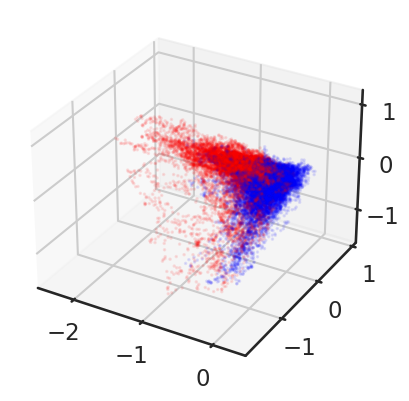

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_dca3[:, 0], X_dca3[:, 1], X_dca3[:, 2], c=velo_eeg['awake'].iloc[9:], cmap='bwr', s=1,alpha=0.1)

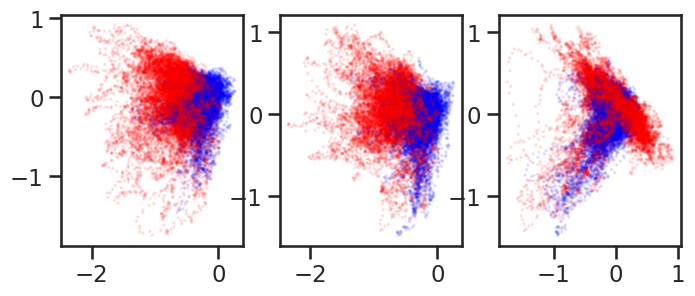

In [ ]:
#plt.plot(X_dca[:,0], X_dca[:,1],lw=0.1, c='k')
fig, axes = plt.subplots(1,3,figsize=(8,3))
axes[0].scatter(X_dca3[:,0], X_dca3[:,1],c=velo_eeg['awake'][9:], cmap='bwr',alpha=0.1,s=1)
axes[1].scatter(X_dca3[:,0], X_dca3[:,2],c=velo_eeg['awake'][9:], cmap='bwr',alpha=0.1,s=1)
axes[2].scatter(X_dca3[:,1], X_dca3[:,2],c=velo_eeg['awake'][9:], cmap='bwr',alpha=0.1,s=1)

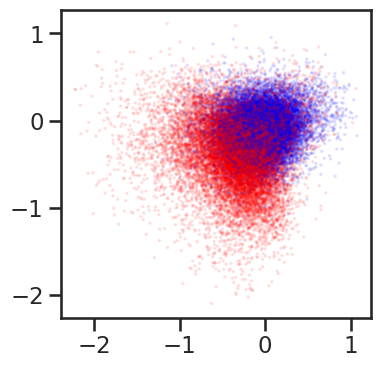

In [ ]:
#plt.plot(X_dca[:,0], X_dca[:,1],lw=0.1, c='k')
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X_dca[:,0], X_dca[:,1],c=velo_eeg['awake'], cmap='bwr',alpha=0.1,s=1)

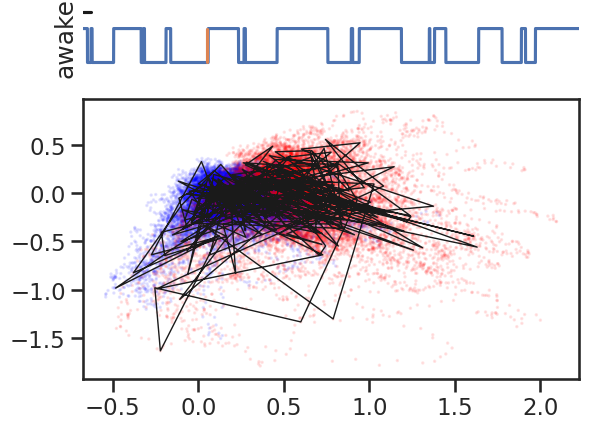

In [ ]:
#plt.plot(X_dca[:,0], X_dca[:,1],lw=0.1, c='k')
fig, (ax_state, ax_scatter) = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,5]})
#axes[0].plot(X_dca[:,0], X_dca[:,1],lw=0.1)
ax_state.plot(velo_eeg['awake'].iloc[9:])
sns.despine(ax=ax_state, left=True, bottom=True)
ax_state.set_xlim([9,len(Xroll_dca)])
ax_state.plot([9,9+600],[1.5,1.5],color='k')
ax_state.set_xticks([])
ax_state.set_yticks([])
ax_state.set_ylabel("awake")

line, = ax_state.plot([900, 900], [0,1])
line.set_data([9000, 9000], [0,1])

ax_scatter.scatter(Xroll_dca[:,0], Xroll_dca[:,1],c=velo_eeg['awake'].iloc[9:], cmap='bwr',alpha=0.1,s=1)
ax_scatter.plot(Xroll_dca[::100,0], Xroll_dca[::100,1],lw=1, c='k')

In [ ]:
from matplotlib.animation import FuncAnimation,FFMpegWriter

fig, (ax_state, ax_scatter) = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,5]})
xdata, ydata = [], []
ln_state, = ax_state.plot([9, 9], [0,1])
ln_scatter, = ax_scatter.plot([], [], 'k-')

line = [ln_state, ln_scatter]

def init():
    ax_state.plot(velo_eeg['awake'].iloc[9:], alpha=0.5)
    sns.despine(ax=ax_state, left=True, bottom=True)
    ax_state.set_xlim([9,len(Xroll_dca)])
    ax_state.plot([9,9+600],[1.5,1.5],color='k')
    ax_state.set_xticks([])
    ax_state.set_yticks([])
    ax_state.set_ylabel("awake")

    ax_scatter.scatter(Xroll_dca[:,0], Xroll_dca[:,1],c=velo_eeg['awake'].iloc[9:], cmap='bwr',alpha=0.1,s=1)
    # ax_scatter.plot(Xroll_dca[::100,0], Xroll_dca[::100,1],lw=1, c='k')

    # ax.scatter(Xroll_dca[:,0], Xroll_dca[:,1],c=velo_eeg['awake'].iloc[9:], cmap='bwr',alpha=0.1,s=1)
    return line

def update(frame):
    x,y = Xroll_dca[frame] #frame
    xdata.append(x)
    ydata.append(y)
    line[1].set_data(xdata[-8:], ydata[-8:])
    line[0].set_data([frame, frame], [0,1])
    return line

ani = FuncAnimation(fig, update, frames=np.arange(0,len(Xroll_dca[9:]),100),#Xroll_dca[::10000],
                    init_func=init, blit=True)
writervideo = FFMpegWriter(fps=6)
ani.save(join(savepath,'dynamics.mp4'), writer=writervideo)
plt.close()


In [ ]:
[][-9:]